plot flow cytometry data

In [1]:
# python modules
import sys
import copy
import re
import random
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats


In [2]:
# custom modules
sys.path.append('/Users/sangwoopark/Projects/condense-seq/postpro_scripts')
import graphics_edit as graphics
import load_file_edit as load_file
import Interval_dict
import statis_edit as statis


In [3]:
# matplotlib setting
%matplotlib inline
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"


In [25]:
### flow cytometry result
cell_mark_values = {'mCD8T:WT':
                    {'H3K4me3':[10540, 9683, 9833],
                     'H3K9ac':[24443, 24014, 23463],
                     'H3K27ac':[5883, 5797, 5981],
                     'H3K27me3':[58063, 64953, 60157],
                     'H3K36me3':[18497, 18953, 18584]},
                    'mCD8T:ODCKO':
                    {'H3K4me3':[10696, 9514, 9813],
                     'H3K9ac':[22685, 23703, 23714],
                     'H3K27ac':[5614, 5167, 5207],
                     'H3K27me3':[73400, 88365, 88295],
                     'H3K36me3':[23668, 29837, 30724]}
                    }
                    

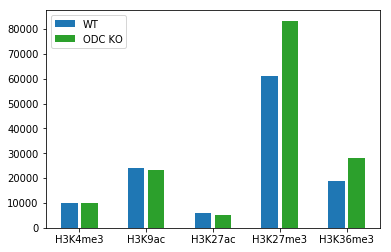

In [26]:
### plot bar plot
marks = ['H3K4me3', 'H3K9ac', 'H3K27ac', 'H3K27me3', 'H3K36me3']
cell1, cell2 = 'mCD8T:WT', 'mCD8T:ODCKO'

fig = plt.figure()
data1 = [np.mean(cell_mark_values[cell1][mark]) for mark in marks]
data2 = [np.mean(cell_mark_values[cell2][mark]) for mark in marks]
pos_list1 = range(len(data1))
pos_list2 = [pos+0.3 for pos in pos_list1]
xticks = [0.5*(pos1+pos2) for pos1, pos2 in zip(pos_list1, pos_list2)]
plt.bar(pos_list1,
        data1,
        width=0.25,
        color='tab:blue',
        label='WT')
plt.bar(pos_list2,
        data2,
        width=0.25,
        color='tab:green',
        label='ODC KO')
plt.xticks(xticks,
           marks)
plt.legend(loc='upper left')
plt.show()
plt.close()


In [27]:
### statistical testing for comparing two states
marks = ['H3K4me3', 'H3K9ac', 'H3K27ac', 'H3K27me3', 'H3K36me3']
cell1, cell2 = 'mCD8T:WT', 'mCD8T:ODCKO'
for mark in marks:
    values1 = cell_mark_values[cell1][mark]
    values2 = cell_mark_values[cell2][mark]
    
    CohenD = statis.get_CohenD (values1, values2)
    pvalue = stats.ttest_ind(values1,
                             values2,
                             equal_var=False)[1]

    print mark
    print "Cohen's d:%f, p-value:%f" % (CohenD, pvalue)
    print

H3K4me3
Cohen's d:0.024864, p-value:0.981447

H3K9ac
Cohen's d:1.365851, p-value:0.245960

H3K27ac
Cohen's d:3.659885, p-value:0.046187

H3K27me3
Cohen's d:4.145463, p-value:0.032237

H3K36me3
Cohen's d:4.227034, p-value:0.050959

